Install and Import Dependencies

In [3]:
!pip install transformers 

In [99]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

Instantiate Model

In [5]:
tockenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

Encode and Calculate Sentiment

In [70]:
tokens = tockenizer.encode('it will be a better opertunity, but i don"t like it', return_tensors='pt')#pt-pytorch

In [71]:
tokens[0]

tensor([  101, 10197, 11229, 10346,   143, 16197, 39899, 33752, 12705,   117,
        10502,   151, 11530,   107,   162, 11531, 10197,   102])

In [72]:
# tockenizer.decode(tokens[0])

In [73]:
result = model(tokens)

In [74]:
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.5418,  2.2777,  2.1620, -0.9331, -3.3167]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [75]:
result.logits

tensor([[ 0.5418,  2.2777,  2.1620, -0.9331, -3.3167]],
       grad_fn=<AddmmBackward0>)

In [76]:
int(torch.argmax(result.logits))+1  # it shows the sentiment b/w 1-5 point values. 1=bad sentiment .... 5 = good

2

Collect Reviews

In [91]:
r = requests.get('https://www.yelp.com/biz/mejico-sydney-2')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [96]:
reviews[0]

'The food is fresh and tasty. \xa0The scallop ceviche started the lunch. The scallops were tender with a great acidity and use of mango and peppers. The steak was tender and I got the hint of tequila in the sauce. I enjoyed a watermelon salad that complimented the the steak. The portions are good, but a stretch if you are sharing. My only down point is the service. They really only showed up to present my next plate and never checked to see if I wanted another drink (which I did).Enjoyed the food.'

Load Reviews into DataFrame and Score

In [100]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [103]:
df['review'].iloc[0]

'The food is fresh and tasty. \xa0The scallop ceviche started the lunch. The scallops were tender with a great acidity and use of mango and peppers. The steak was tender and I got the hint of tequila in the sauce. I enjoyed a watermelon salad that complimented the the steak. The portions are good, but a stretch if you are sharing. My only down point is the service. They really only showed up to present my next plate and never checked to see if I wanted another drink (which I did).Enjoyed the food.'

In [106]:
def sentiment_score(review):
  tokens =tockenizer.encode(review,  return_tensors='pt')
  result = model(tokens)
  return int(torch.argmax(result.logits))+1

In [107]:
sentiment_score(df['review'].iloc[0])

4

In [110]:
df['sentiment'] = df['review'].apply(lambda x : sentiment_score(x[:512])) #NLP pipline limited as to how many tokens can pass through it at one particular time here it limited to 512

In [111]:
df

,review,sentiment
0,The food is fresh and tasty. The scallop cevi...,4
1,Don't come here expecting legit Mexican food b...,3
2,Out of all the restaurants that I tried in Syd...,5
3,We came here on a Thursday night @ 5pm and by ...,4
4,Have been here twice and have absolutely loved...,5
5,I was pleasantly surprised at what a great job...,5
6,Really nice (upmarket) Mexican restaurant. Goo...,4
7,If you're looking for a quiet little romantic ...,2
8,The service at this place was top notch - the ...,5
9,Ordered feed me for $59 along with that.. Food...,2


In [147]:
df['review'].iloc[2]

"Out of all the restaurants that I tried in Sydney, this was definitely the most reasonably priced one offering good food of course. We started off with Margarita's - they have $10 margaritas on Mondays (or perhaps all weekdays). We lost count of how many we had, they were so good. On to the food, we tried a little bit of everything - we ordered corn lollipops, jalapeño poppers, grilled halloumi, batata bravas to start and we shared 2 items from the grill which I can't remember (probably because of the margarita's). We ended with churros & chocolate sauce which was awesome. Service was good and the staff waiting us was very friendly. He also recommended us portions for certain items to match our party size. For instance, we didn't have to order 2 portions of an appetizer instead we could order one and a half portion which I think was great. It allowed us to chose more dishes than more quantity of the same dish."

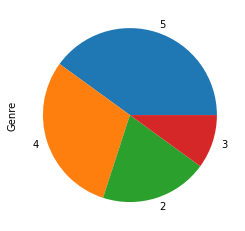

In [146]:
df.sentiment.value_counts().plot(kind='pie', label='Genre')

In [ ]:
df.genres